# Kaggle_Abalone

In [31]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### sklearn.preprocessing.StandarScaleer()
- 각각의 feature마다 독립적으로 값을 중앙으로 옮기고 스케일링을 해줌
- The magical formula which performs standardization:  
$
    x_{scaled} = \cfrac{x-\text{mean}}{sd}
$
<img src="./Standardization.png" width="400px" height="250px" title="Standardization"></img>
$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \text{mean 0, variance 1}$
- **fit_transform()**
    - train dataset에만 사용
    - 만들어진 모델은 train data 에 있는 mean과 variance를 학습
    - 학습된 Scaler()의 parameter는 test data를 scale하는데 사용
    - 즉, train data로 학습된 Scaler()의 parameter를 통해 test data의 feature값들이 scale됨
- **transform()**
    - train data로부터 학습된 mean, variance parameter를 test data에 적용하기위해 사용
    - test data에 사용

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read data
df = pd.read_csv('./Abalone.csv')

# Drop Outliers
#df = df.drop(df.loc[df['Height'] > 0.3].index, axis=0)

# Convert Categorical variable(for instance, Sex) into Dummy/Indicator variables.
df = pd.get_dummies(df)

# Scaling
# X_numerical data & X_categorical data
#float_columns = [x for x in df.columns if x not in ['Sex_F', 'Sex_I', 'Sex_M', 'Rings']]
float_columns = [x for x in df.columns if x not in ['Rings']]
sc = StandardScaler()
df2 = df.copy()
df[float_columns] = sc.fit_transform(df[float_columns])

#df.to_csv('Abalone_scaled.csv', encoding='utf-8-sig')

# Train_Test DataSet
X = df.drop(['Rings'], axis =1)
Y = df['Rings']
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.674834,1.453451,-0.759488


In [55]:
"""
X_num = df2[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]
X_cat = df2[['Sex_F', 'Sex_I', 'Sex_M']]
Y = df['Rings']

sc = StandardScaler()
sc.fit(X_num)
X_scaled = sc.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
X.head()
"""

"\nX_num = df2[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',\n       'Viscera weight', 'Shell weight']]\nX_cat = df2[['Sex_F', 'Sex_I', 'Sex_M']]\nY = df['Rings']\n\nsc = StandardScaler()\nsc.fit(X_num)\nX_scaled = sc.transform(X_num)\nX_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)\nX = pd.concat([X_scaled, X_cat], axis=1)\nX.head()\n"

In [56]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(df[['Length','Height','Shucked weight','Viscera weight','Shell weight',
                              'Sex_I','Sex_F','Sex_M']])

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.200693,-1.524930,-1.208312,-0.406196,-0.092438,-0.154668,0.070383,6.969125e-15
1,-2.291462,-1.544416,-1.664604,-0.071470,0.024327,0.208100,0.052620,2.740736e-15
2,-0.091155,1.484247,-1.147717,0.134312,-0.107317,-0.294495,-0.018837,-1.273451e-15
3,-0.924352,-1.508608,-1.113413,0.206784,0.018279,0.105655,-0.005480,4.961357e-15
4,-3.508636,0.177694,0.465923,-0.184784,0.020287,0.255060,0.036202,5.590762e-16
5,-2.597631,0.203233,0.831672,-0.135624,-0.147064,-0.123559,-0.056373,3.048717e-14
6,0.373435,1.505079,-0.971871,0.412452,-0.795432,-0.050904,0.130397,2.360532e-15
7,0.119039,1.483896,-1.051762,-0.194333,-0.356995,-0.303053,0.090216,-5.965176e-17
8,-0.775629,-1.503704,-1.054153,0.188107,-0.049915,-0.138619,-0.007481,-1.015021e-17
9,0.594794,1.502380,-0.868730,0.254531,-0.551680,-0.127250,0.242328,-2.752377e-17


<Figure size 1080x1080 with 0 Axes>

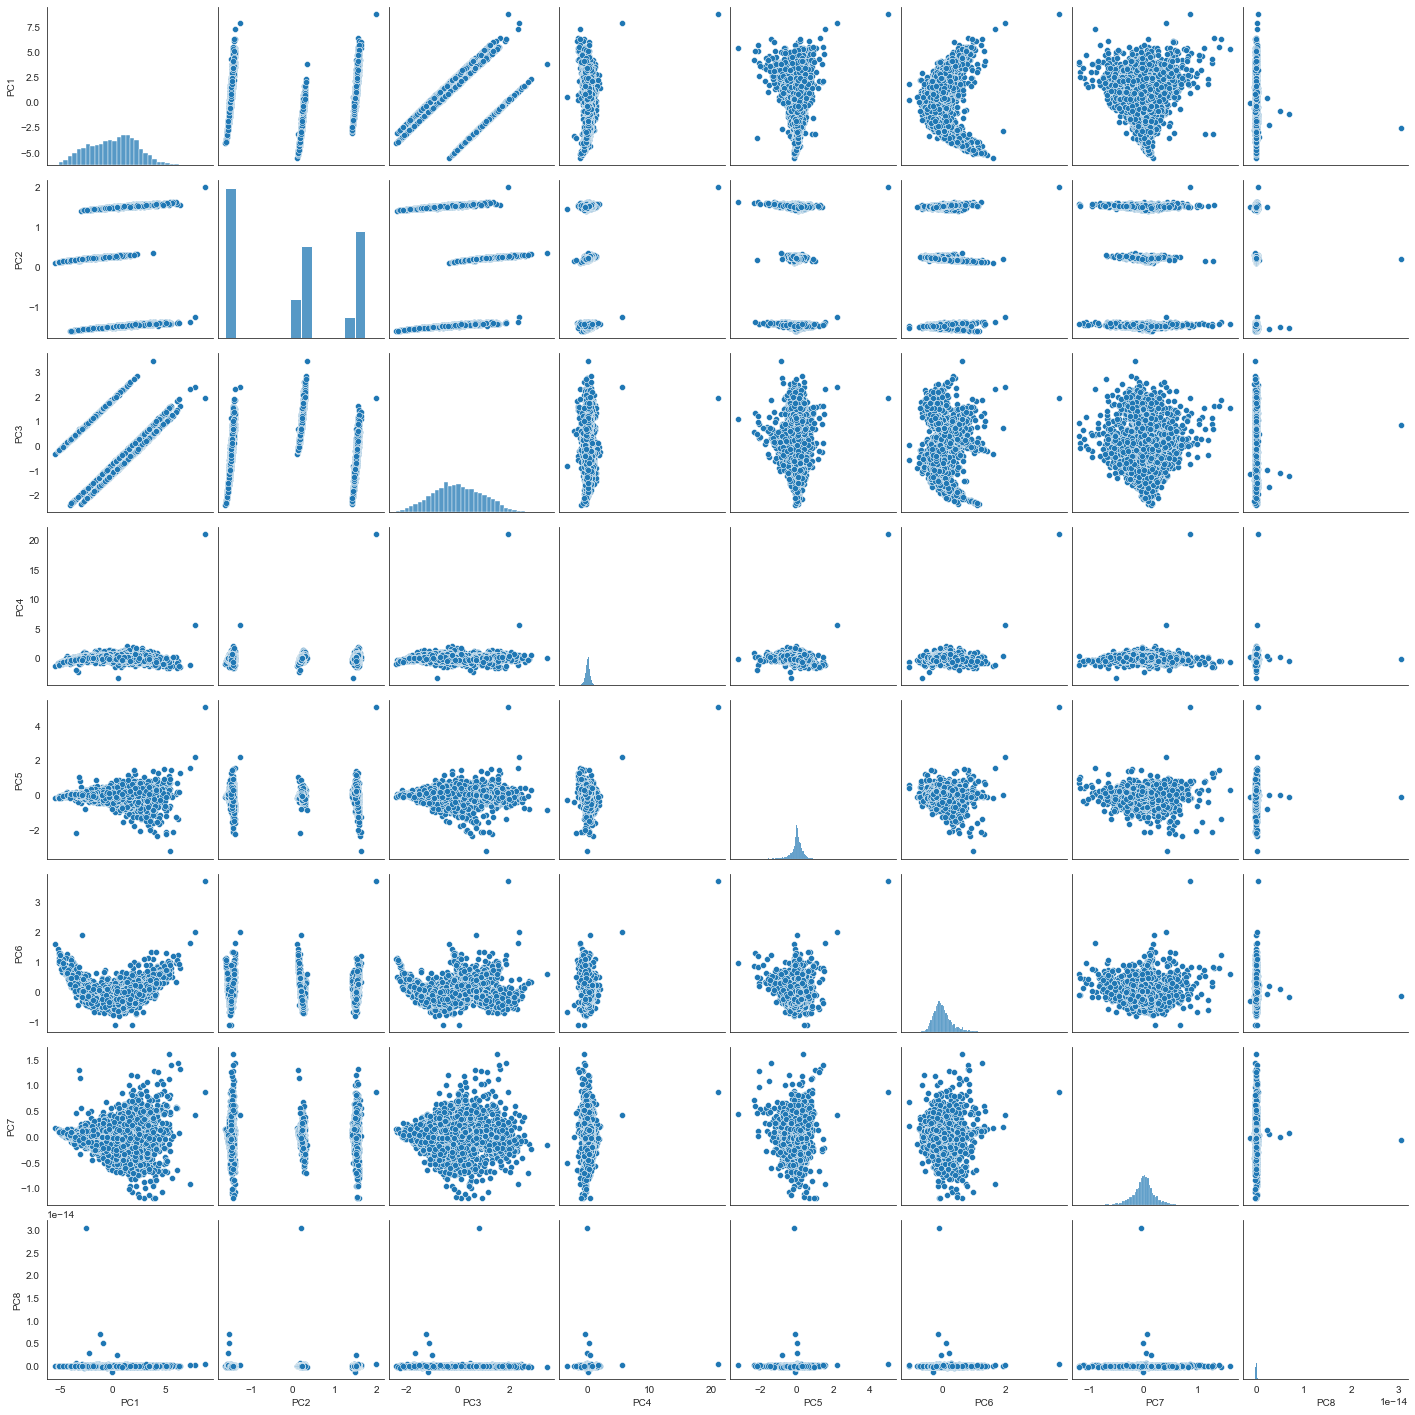

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.set_style('white') # background
plot_kws={"s": 1}
g = sns.pairplot(
             X_pca,
             # kind='reg',
             diag_kind='hist',
             corner=False,
             # plot_kws=dict(scatter_kws=dict(s=5)),
             palette='cividis',
             # hue='kmeans'
            )

# g = g.map_diag(sns.kdeplot, lw=2)
# g = g.map_offdiag(sns.kdeplot, lw=0.5)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, shuffle=True)
# radom_state: Seed, shuffle(*default) = True

X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
2813,-2.240073,-2.145327,-2.187610,-1.542891,-1.491720,-1.493198,-1.565200,0,1,0
3212,0.508327,0.525544,0.800601,0.520508,0.069039,1.328191,0.619562,1,0,0
4077,0.216830,0.273575,-0.368699,-0.178517,-0.050498,-0.201203,-0.235657,0,1,0
1892,0.341757,0.424756,0.540757,0.135789,0.251730,0.132068,0.051812,0,0,1
3775,0.466684,0.424756,0.410834,-0.001975,-0.172292,0.154895,0.041031,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2897,0.175187,0.223181,0.280912,-0.176476,-0.030200,-0.205768,-0.221284,0,1,0
2765,0.258472,0.273575,0.150990,-0.267298,-0.438433,-0.210333,0.008691,0,1,0
905,-1.698722,-1.691783,-1.278155,-1.369411,-1.304519,-1.406456,-1.410686,0,1,0
3982,0.466684,0.273575,0.280912,0.128646,0.017165,0.109242,0.091338,0,1,0
